In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# EDA To Prediction (DieTanic)

## Part1: Exploratory Data Analysis(EDA)

In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # 스타일시트 'fivethirtyeight' 사용
import warnings
warnings.filterwarnings('ignore') # 경고 무시
%matplotlib inline

In [3]:
# 데이터 불러오기
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked**에 결측치가 존재함.

### How many Survived?
- 얼마나 많은 사람들이 살아남았는지 pieplot과 couuntplot으로 시각화

**pie**
- autopct: 부채꼴 안에 표시될 숫자의 형식
- explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도 (0.1 = 10%)
- shadow: 그림자


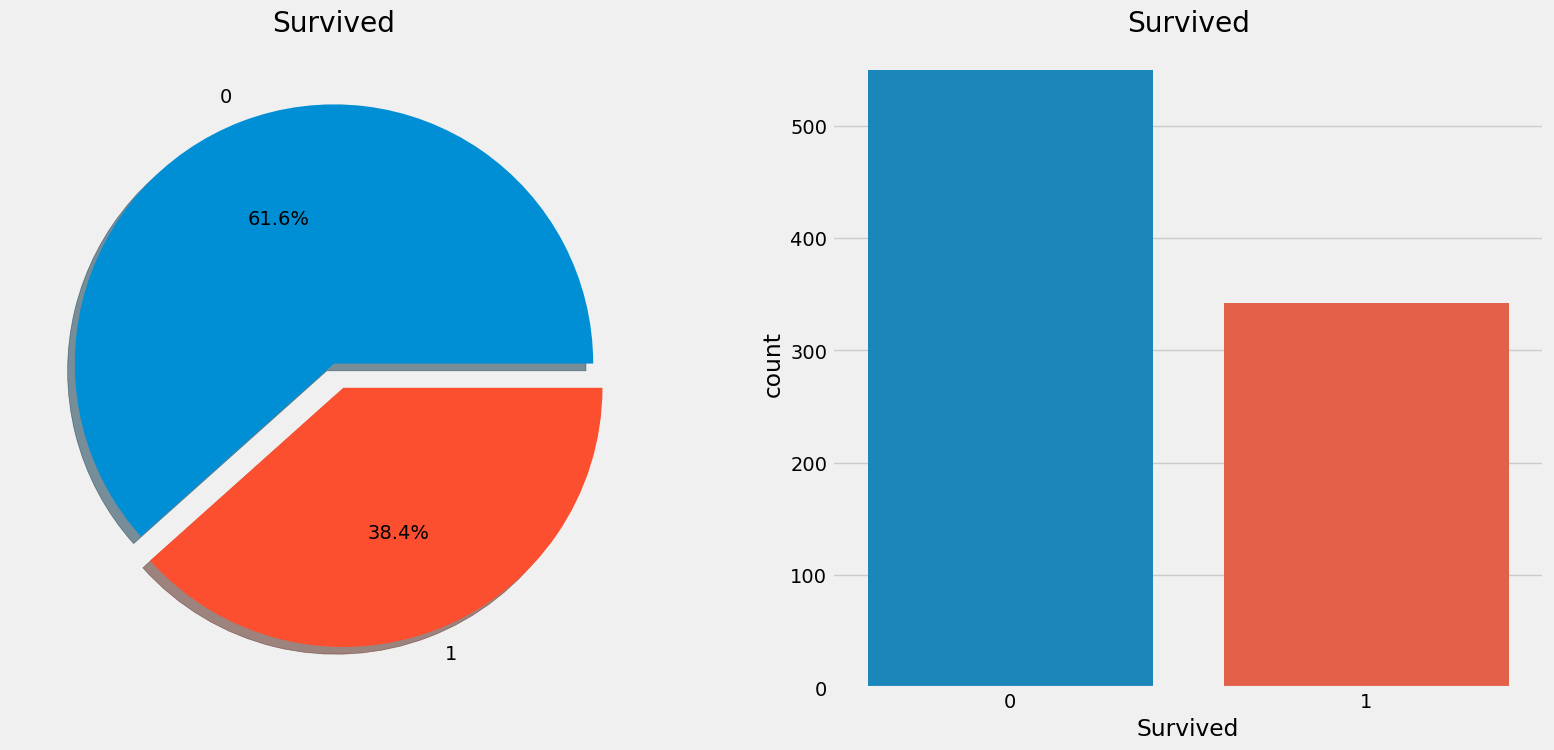

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 1행 2열 18x8 사이즈

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) 
ax[0].set_title('Survived') # 제목
ax[0].set_ylabel('') # ylabel 빈칸 처리

sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 'Survived' 시각화를 통해 많은 사람들이 살아남지 못했음을 알 수 있음 (전체의 38.4%만 생존)
- 앞으로 어떤 카테고리의 탑승객이 생존했는지, 생존하지 못했는지 살펴봄

### Types of Features

#### Categorical Features
- 2개 이상의 카테고리 변수
- ex) 성별(남/여)
- 정렬하거나, 순위를 매길 수 없는 변수
- 명목 변수
- **Sex**, **Embarked**

#### Ordinal Features
- 정렬, 순위매기기 가능
- ex) 키(tall/medium/short)
- **PClass**

#### Continous Features
- **Age**

### Analysing The Features

#### Categorical Feature: Sex

In [6]:
# 'Sex', 'Survived' 기준으로 그룹핑 후 'Survived' 값 세기
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

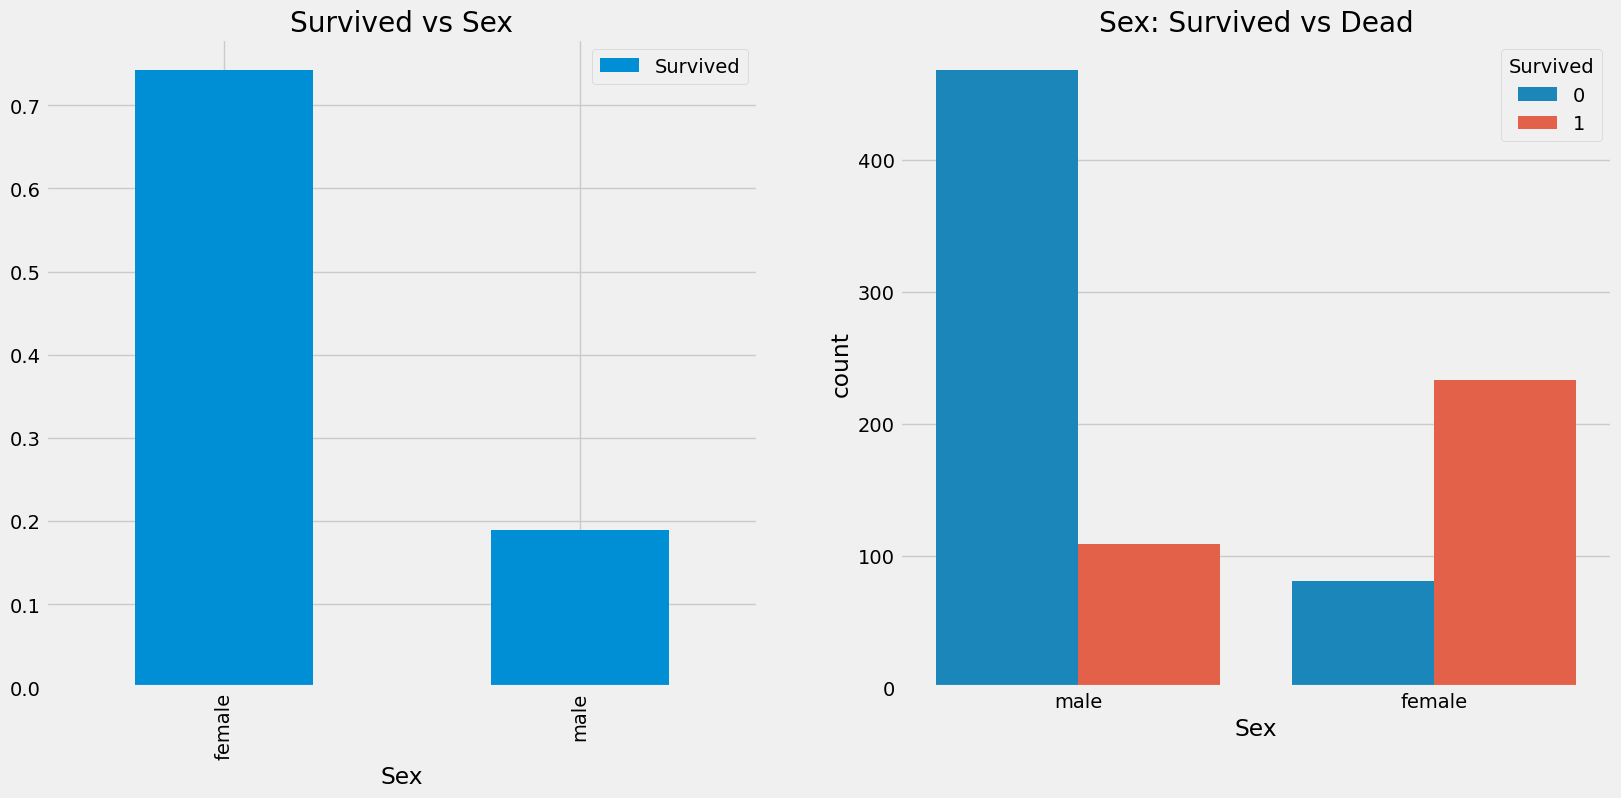

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 1행 2열 18x8 사이즈

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex') # 제목

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1]) # hue: 구분
ax[1].set_title('Sex: Survived vs Dead') # 제목
plt.show()

- 배에 탑승한 남자 인원수는 여자보다 많지만, 실제로 생존한 사람의 성별은 여성이 남성의 두배임을 알 수 있음
- 여성의 생존률은 약 75%인 반면, 남자의 생존률을 18-19% 정도임
- 모델링에 있어 중요한 특성으로 보임
- 이어서 다른 특성들도 살펴봄

#### Ordinal Feature: Pclass

**crosstab**
- pd.crosstab(index, columns,margins)
- index: y축에 위치할 값
- columns: x축에 위치할 값
- margins: 총합
- .style.background_gradient(cmap='summer_r'): 배경색

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


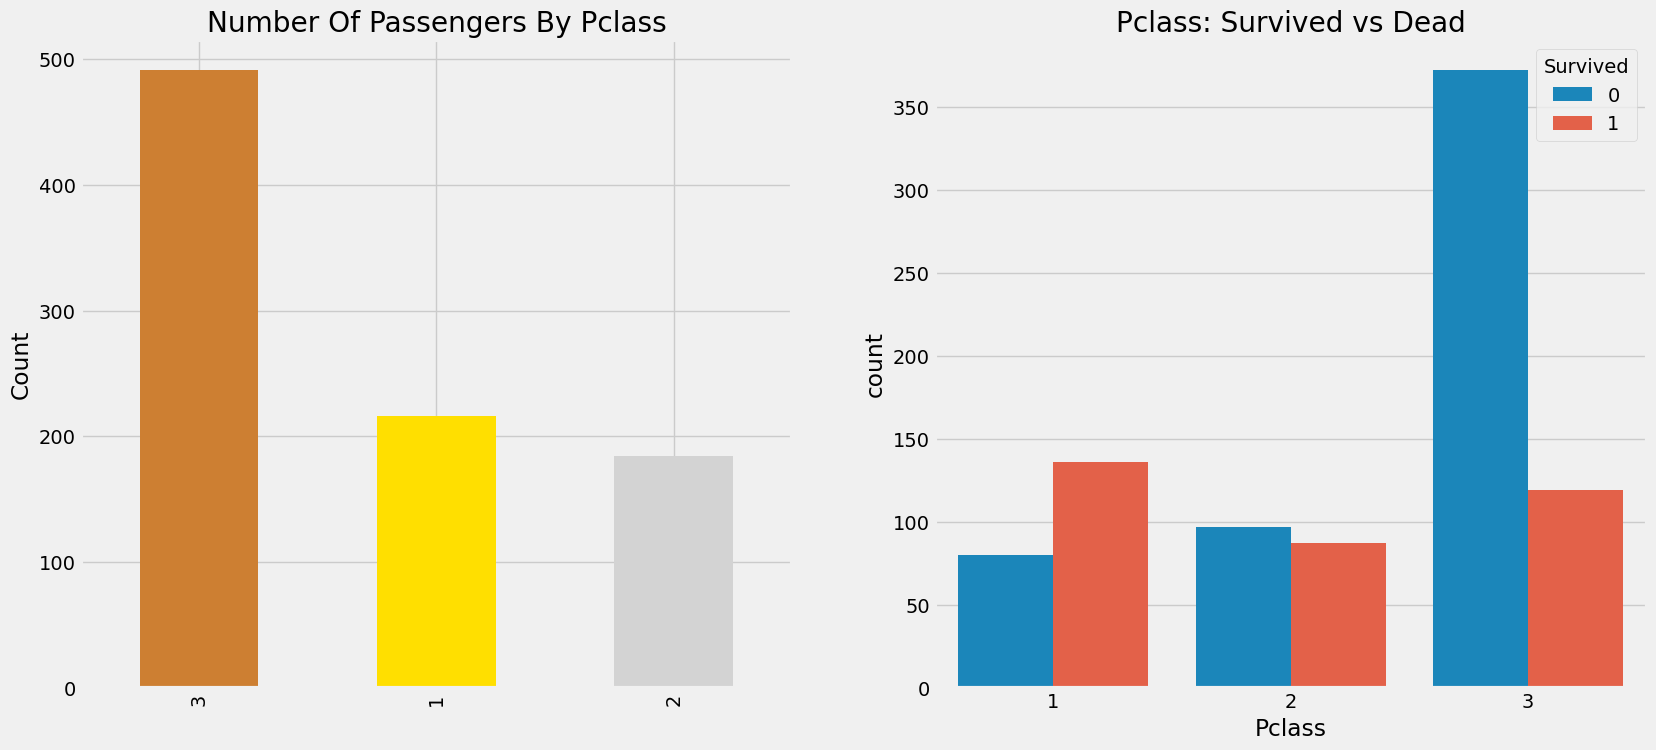

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- Pclass별 생존 여부를 보면, 1등급의 탑승객이 가장 많이 생존했음.
- 3등급 탑승객이 가장 많지만, 약 25% 정도의 매우 낮은 생존율을 보임.
- 1등급 탑승객은 약 63%가 생존, 2등급 탑승객은 약 48%가 생존
- => 이를 통해 돈과 지위가 중요함을 알 수 있음
- 이어서 Sex와 Pclass를 같이 비교

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

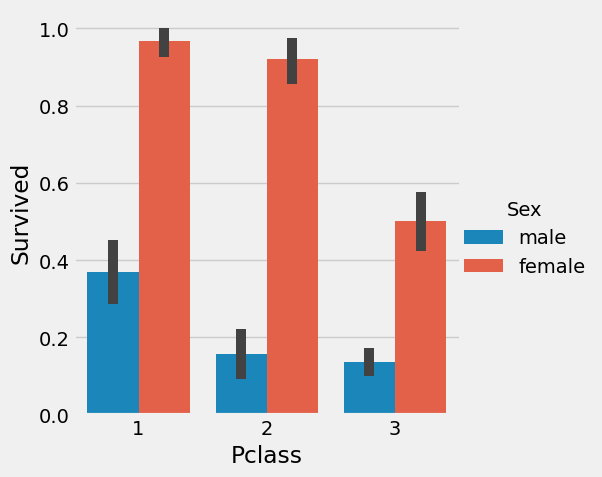

In [11]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar')
plt.show()

- 1등급의 여성들은 약 95-96% 생존했음.(1등급에서 단 3명의 여성만 사망)
- 등급에 관계없이 여성들은 구조 우선순위였을 것임
- 1등급 남성들의 생존률이 조차 매우 낮음
- Pclass도 매우 중요한 특성으로 보임.
- 이어서 다른 특성들도 분석

#### Continous Feature: Age

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Passenger was of:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Passenger was of: 29.69911764705882 Years


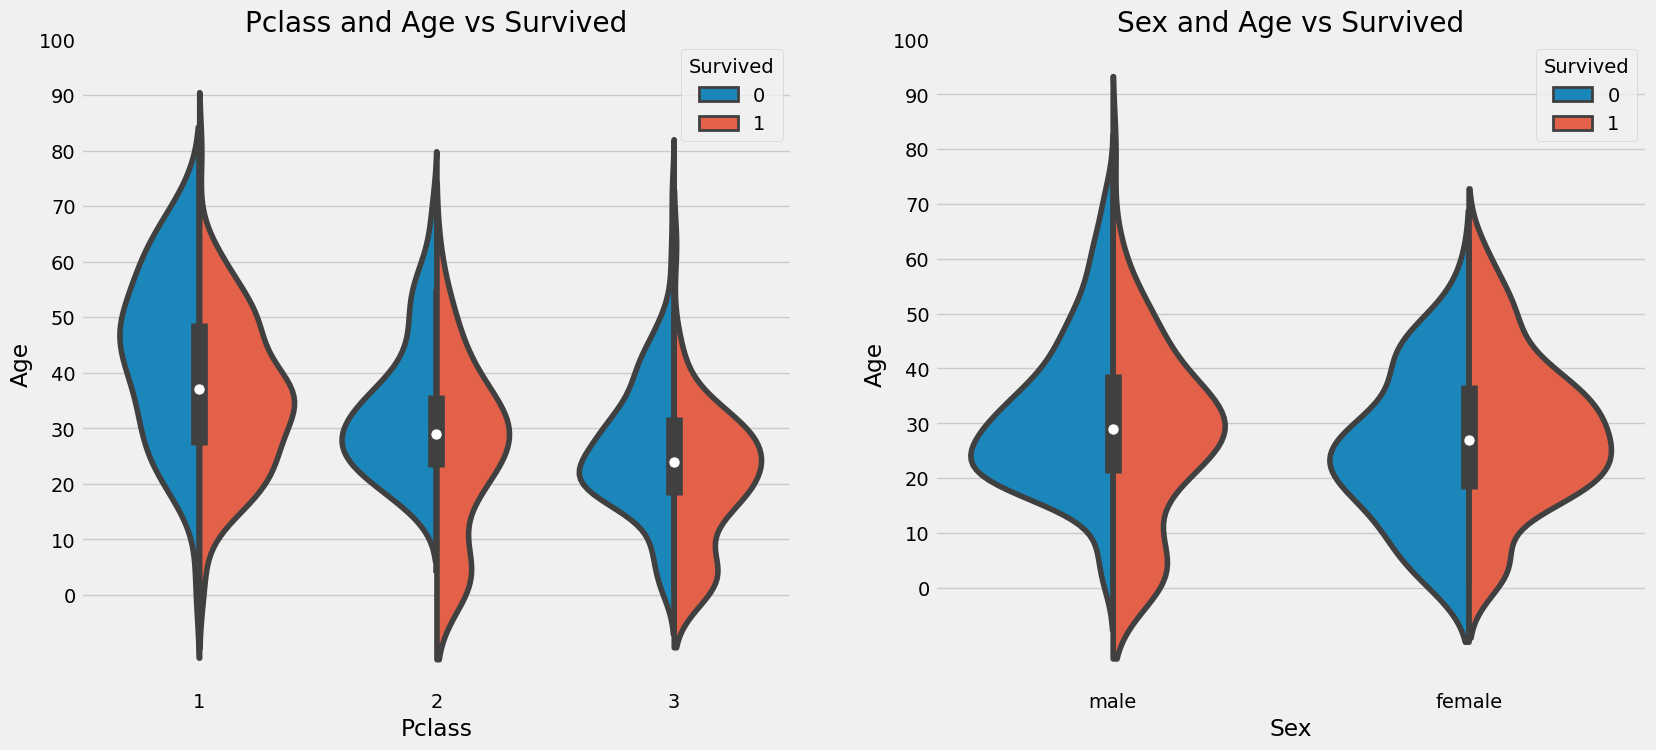

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- Pclass와 함께 어린이의 수가 증가하고, 10세 이하의 승객의 생존율은 Pclass와 관계없이 양호함
- 1등급에 탑승한 20-50대 승객들의 생존 가능성이 높고, 특히 여성의 생존율이 높음
- 남성에게 있어 나이가 높을 수록 생존 가능성이 낮음

앞서 살펴봤던 177개의 Age 결측치를 평균값으로 대체함
- 하지만, 4살 아이를 평균값인 29살로 대체할 수는 없음
- Name을 확인하여 여성/남성을 구분한 후, 각 성별 Age의 평균값으로 대체

In [14]:
data['Initial']=0
# Name에서 A-Z 또는 a-z 사이의 문자 뒤에 점(.)이 붙는 문자열을 추출
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
# Sex에 따른 Initial 확인
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Miss를 나타내는 Mlle, Mme 같이 철자가 틀린 값들이 존재하므로 Miss로 대체해주고, 다른 값들도 같은 방식으로 대체

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [17]:
# Initial별 Age 평균
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [18]:
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial']=='Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial']=='Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial']=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any() # 하나라도(= any) 결측치가 있으면 True 리턴

False

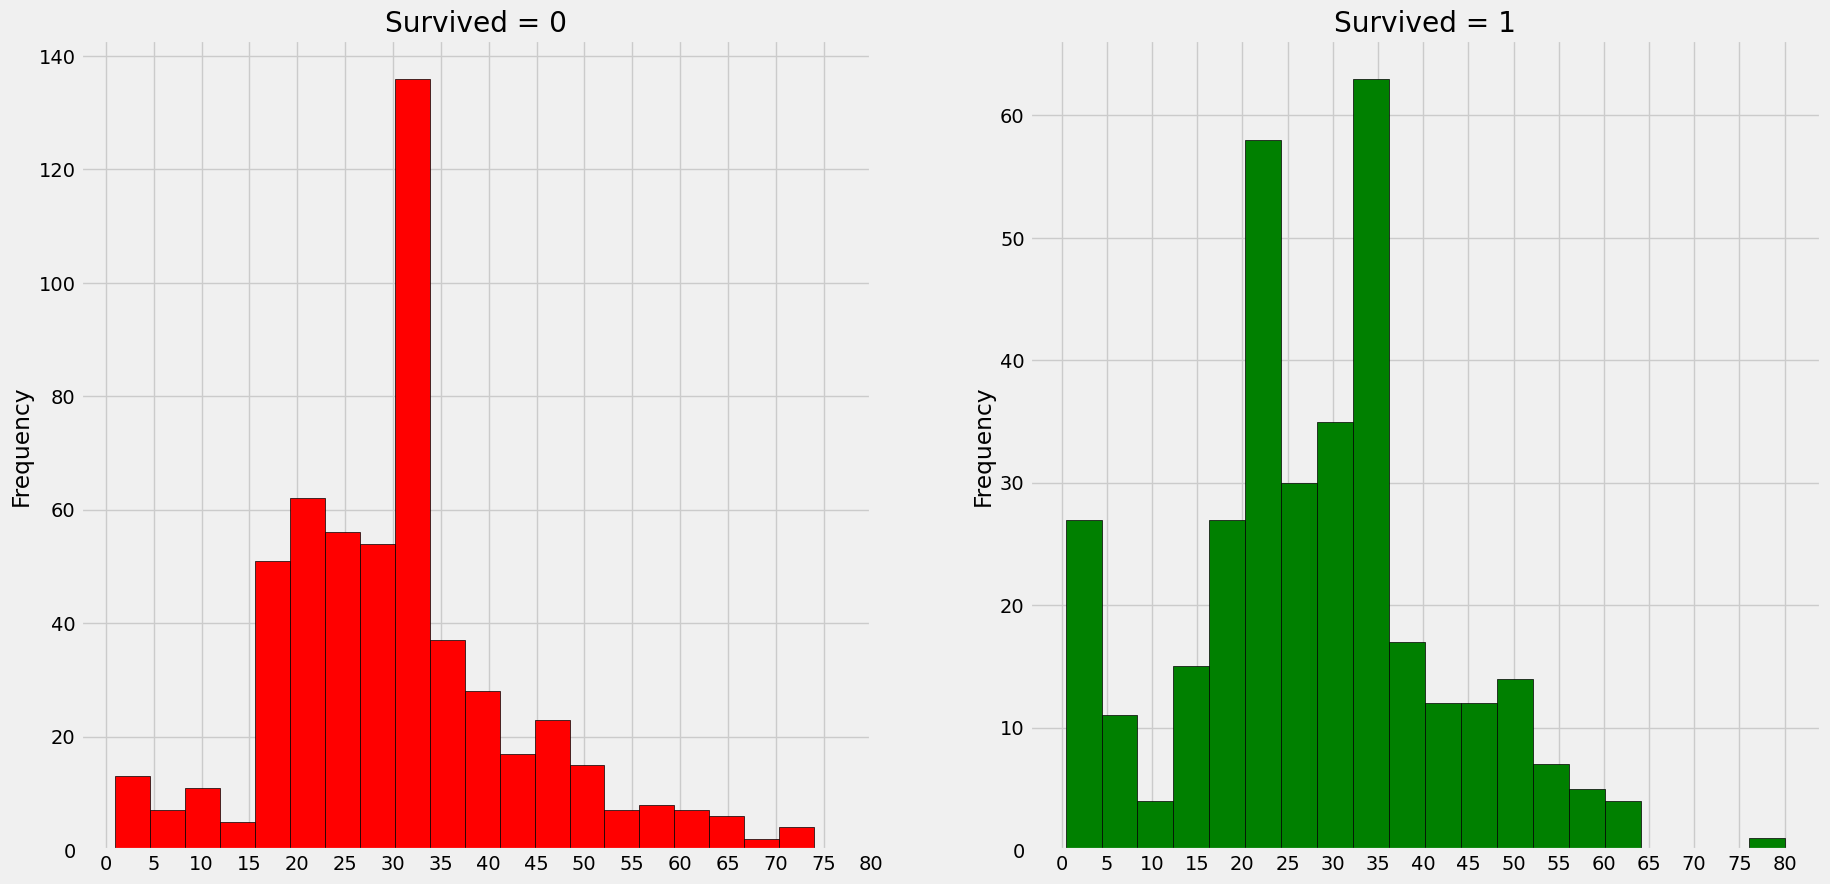

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
# 생존하지 못한 사람들의 Age 히스토그램
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black',color='red') # bins: 계급(=단위)
ax[0].set_title('Survived = 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1) # x축 범위

# 생존한 사람들의 Age 히스토그램
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2) # x축 범위
plt.show()

- 5세 이하 아이들은 상당수 생존함(여성과 아이는 우선이라는 정책)
- 가장 나이가 많은 승객 생존
- 3-40대에 가장 많은 사망자 발생

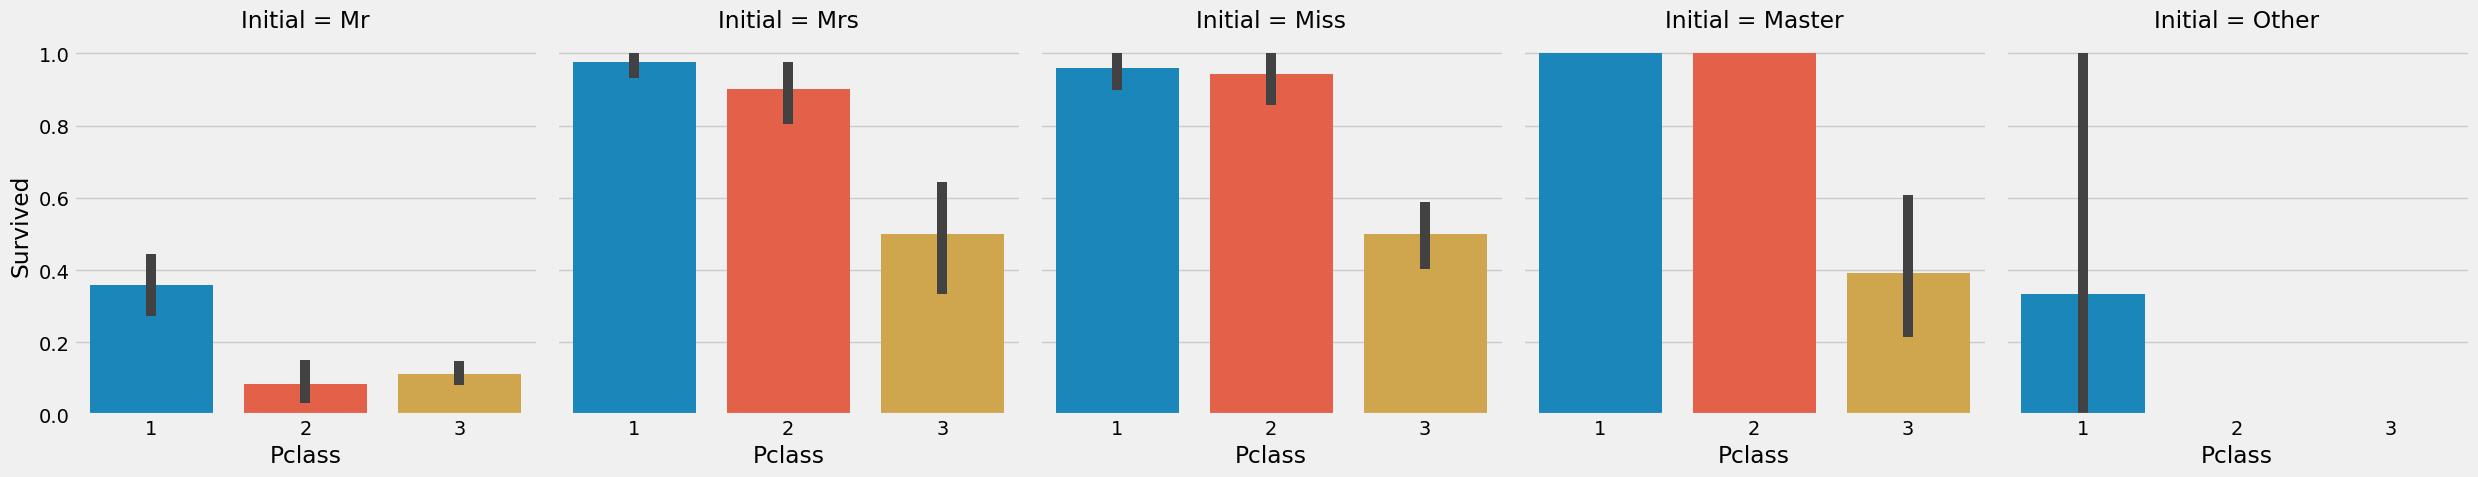

In [21]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='bar')
plt.show()

- 등급에 상관없이 여성과 아이는 우선이라는 정책은 동일함